In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# for data load
import os


# for reading and processing images
import imageio
from PIL import Image
from PIL import Image
import glob
import tensorflow as tf

In [5]:
from IPython.display import clear_output


In [6]:
def load_data(imagepath,maskpath):
    """
    input: takes in the image and image mask path
    Return: list of images and llist of masked images 
    """
    image_list =[]
    mask_list =[]
    imagepath = '{}*.jpg'.format(imagepath)
    mask_path ='{}*.png'.format(maskpath)
    #images 
    for filename in glob.glob(imagepath): #assuming gif
        #im=Image.open(filename)
        image_list.append(filename)
    #masks 
    for filename in glob.glob(mask_path): #assuming gif
        #im=Image.open(filename)
        mask_list.append(filename)
    #sort images and masks 
    image_list.sort()
    mask_list.sort()
    return image_list, mask_list

In [7]:


imagepath = 'train_folder/'
maskpath = 'train_folder_gt/'
image_list,mask_list = load_data(imagepath,maskpath)

In [8]:
image_list_one = image_list[:10]
len(image_list)

564480

(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[0]
(128, 128, 3)
[  0 255]
(128, 128, 3)
[0]


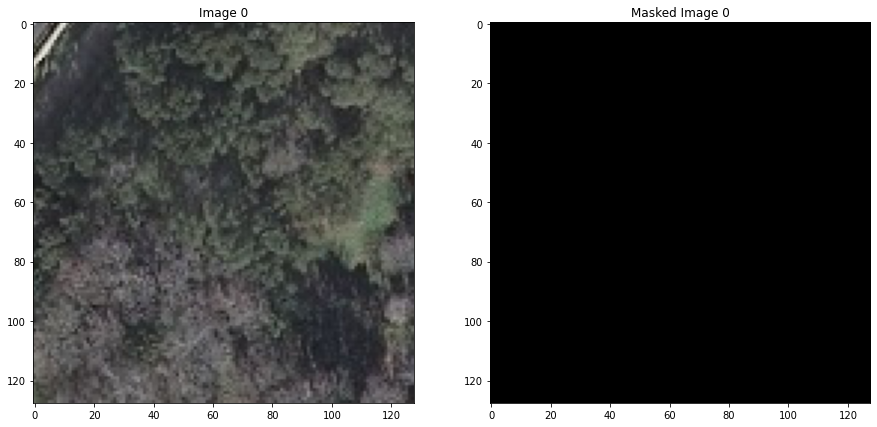

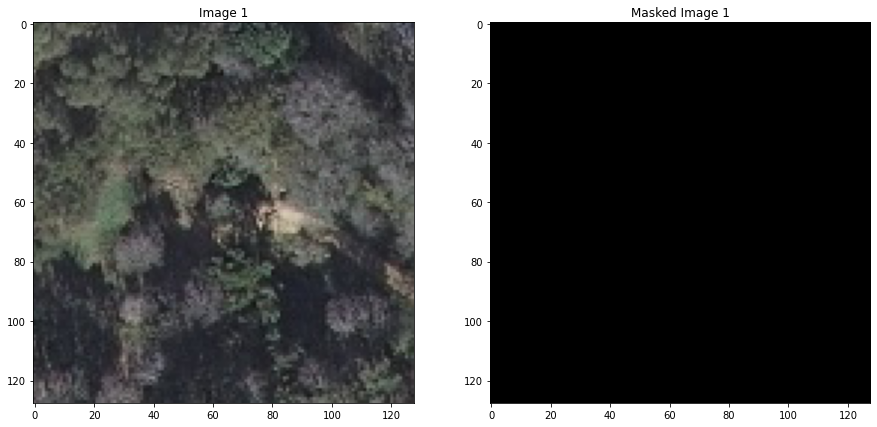

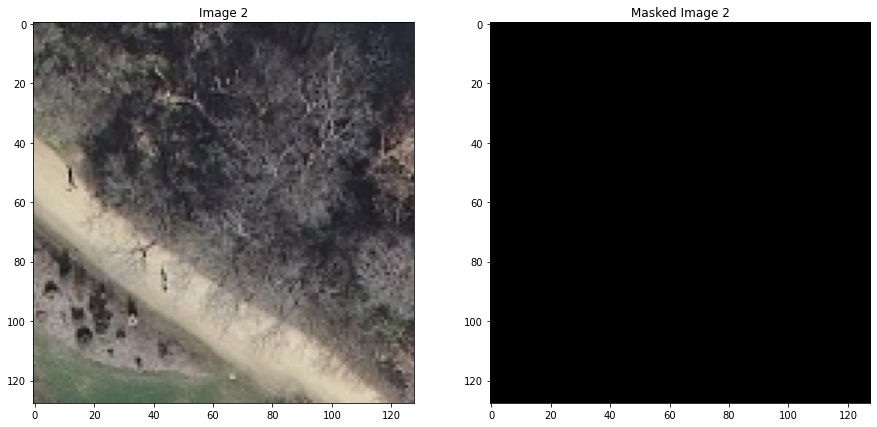

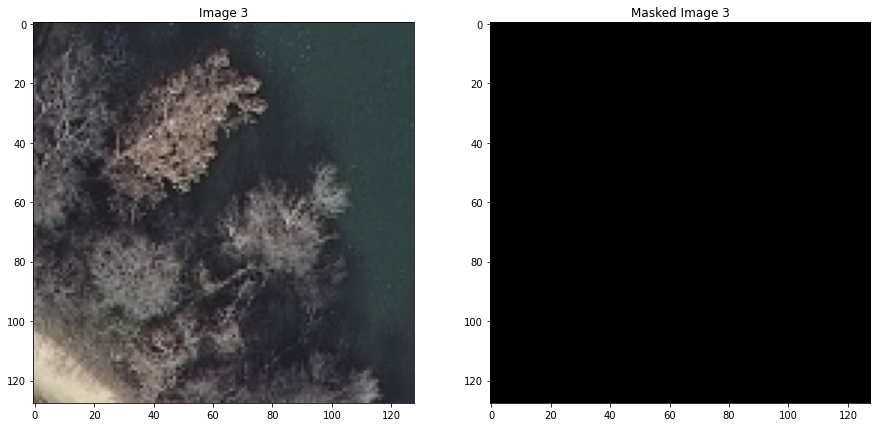

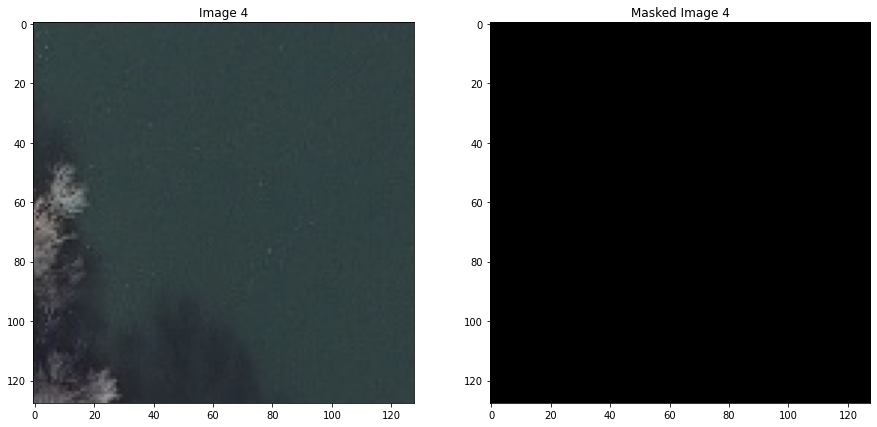

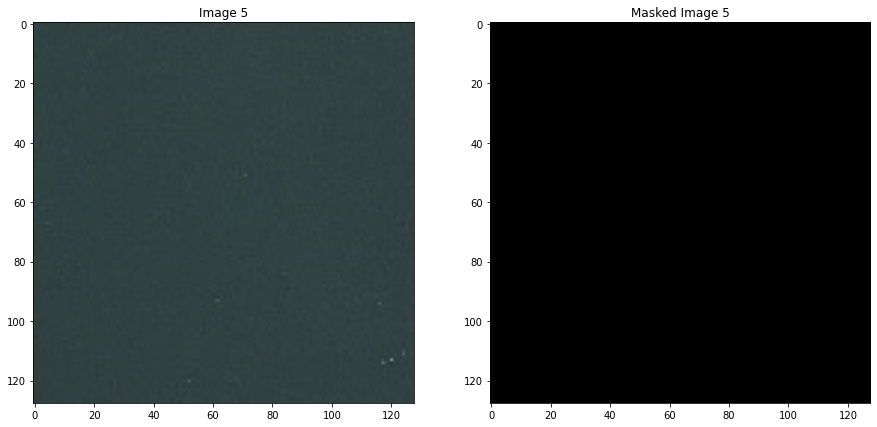

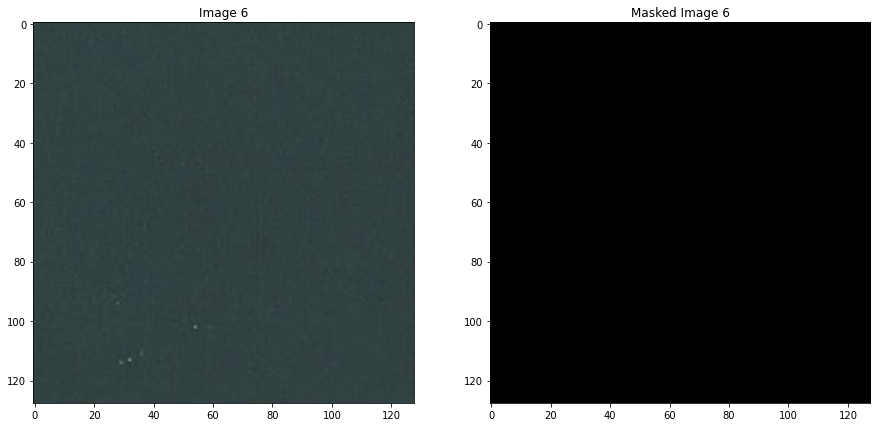

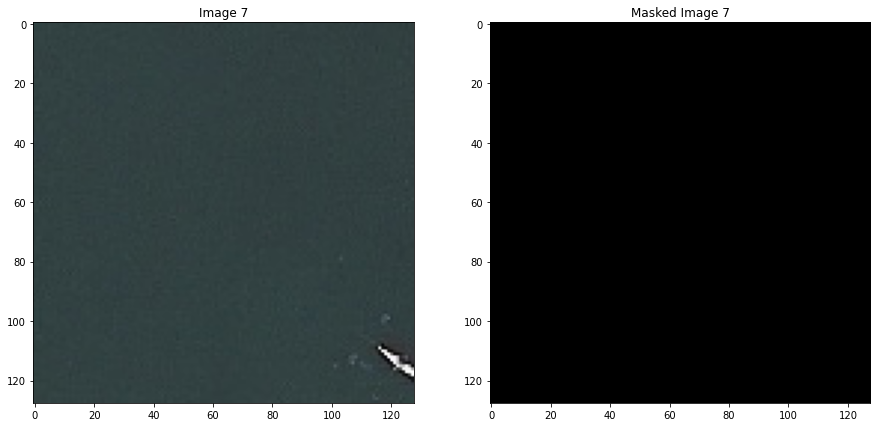

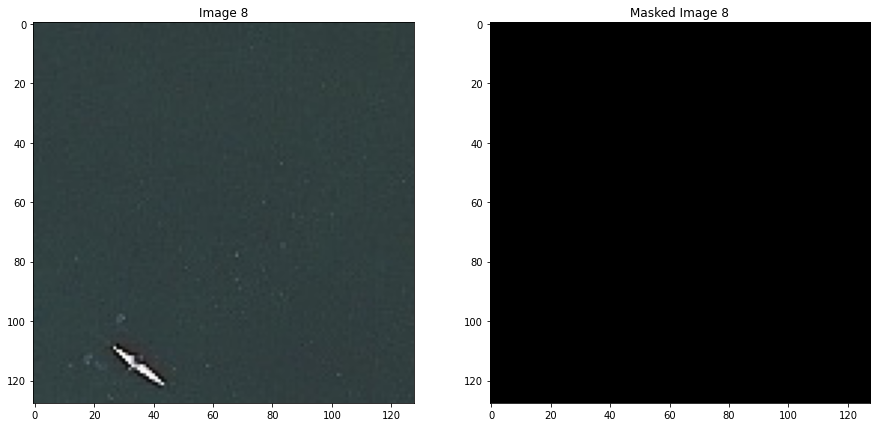

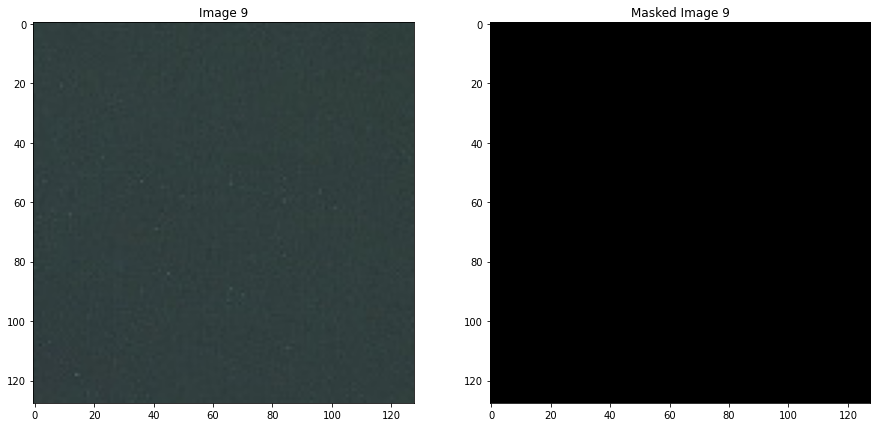

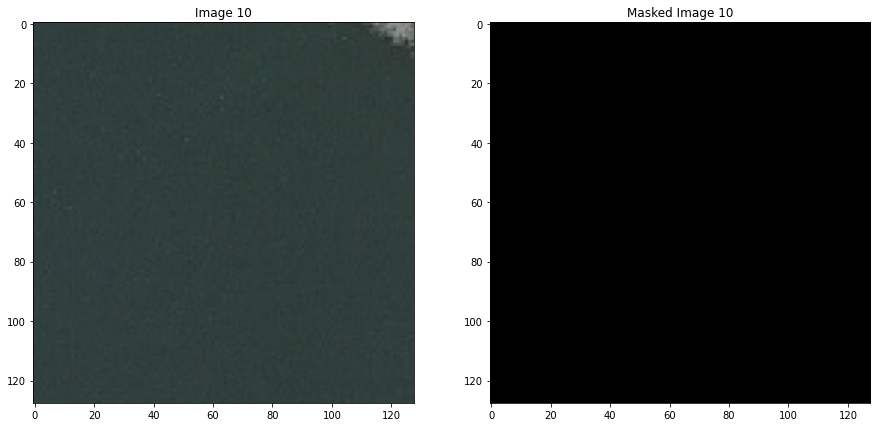

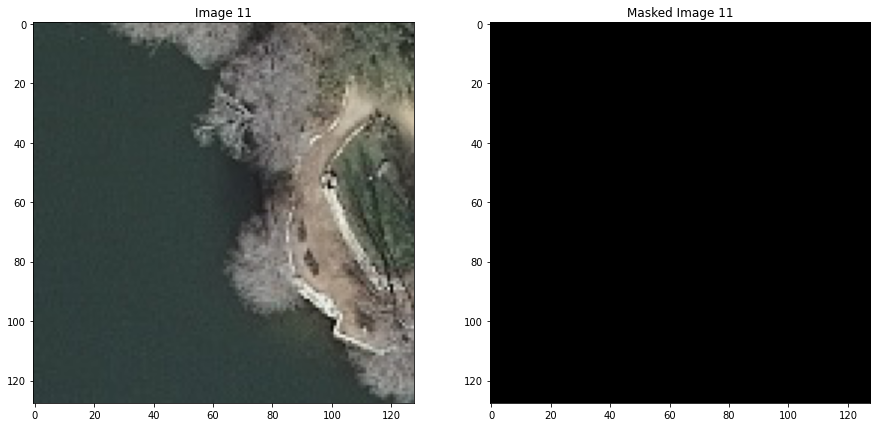

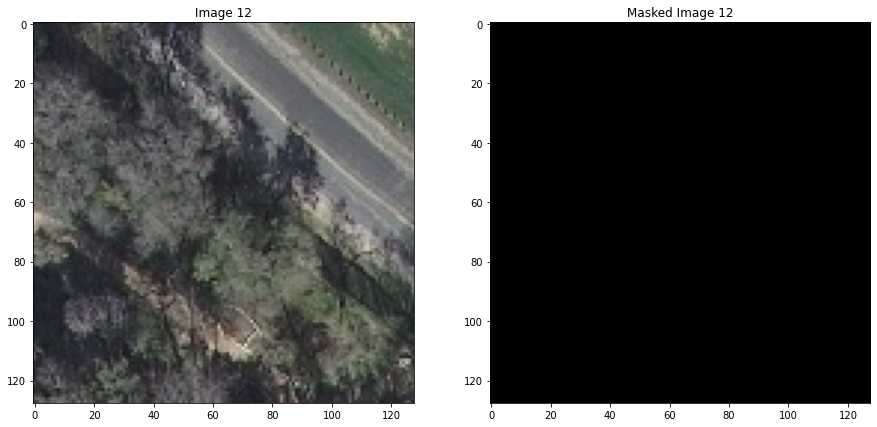

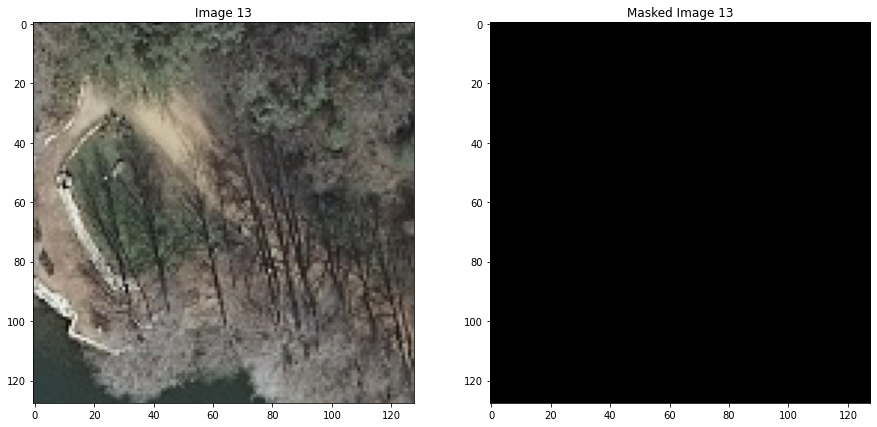

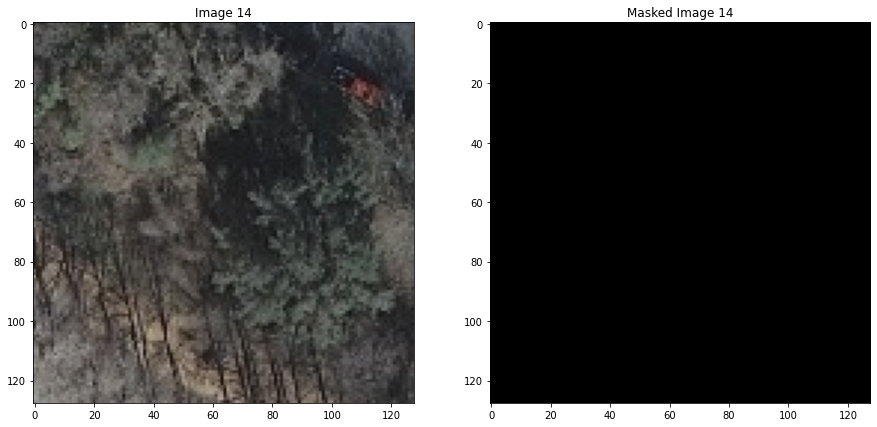

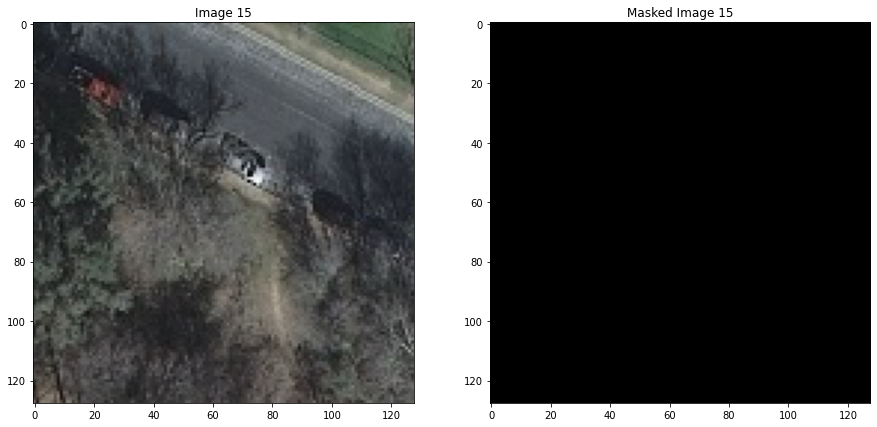

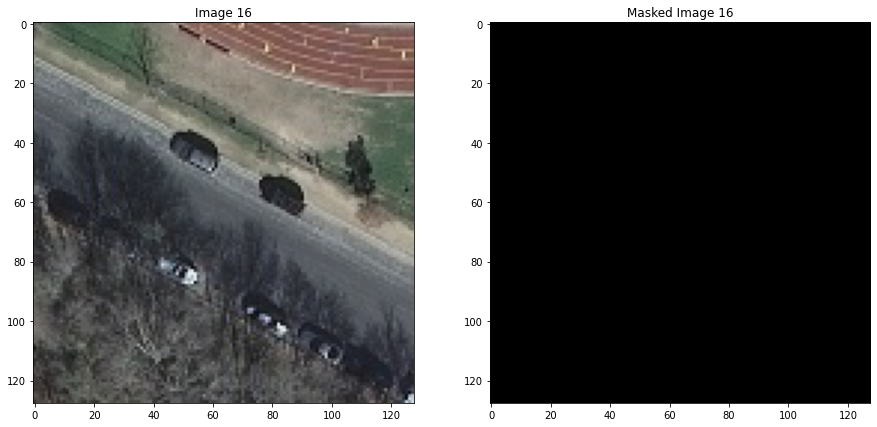

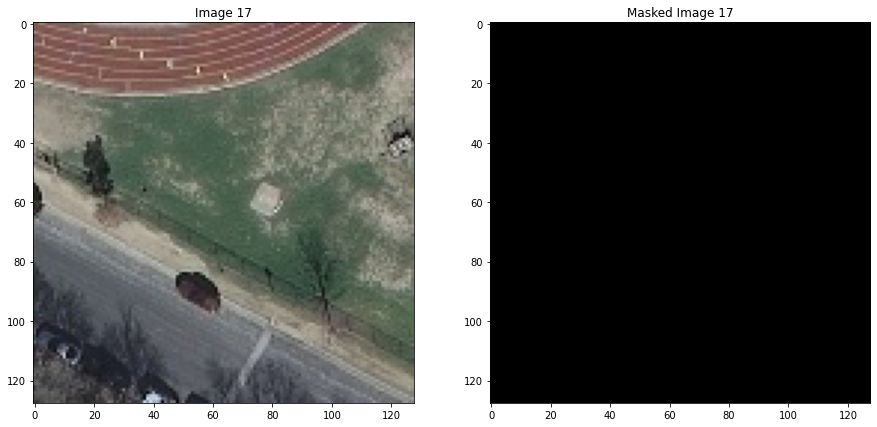

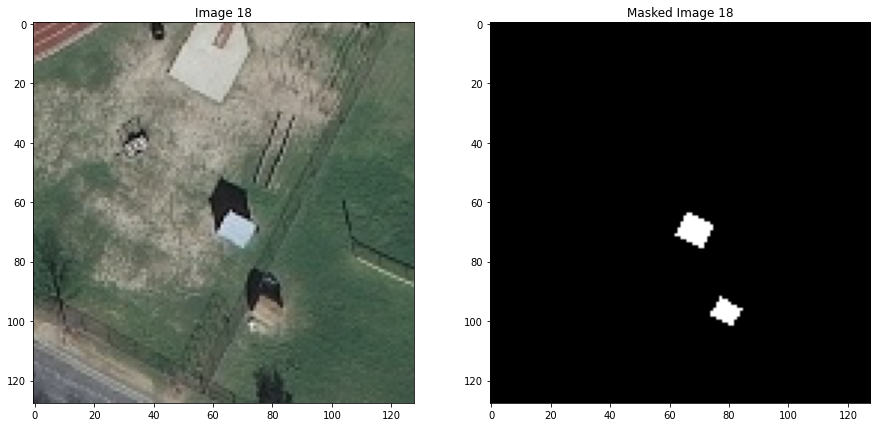

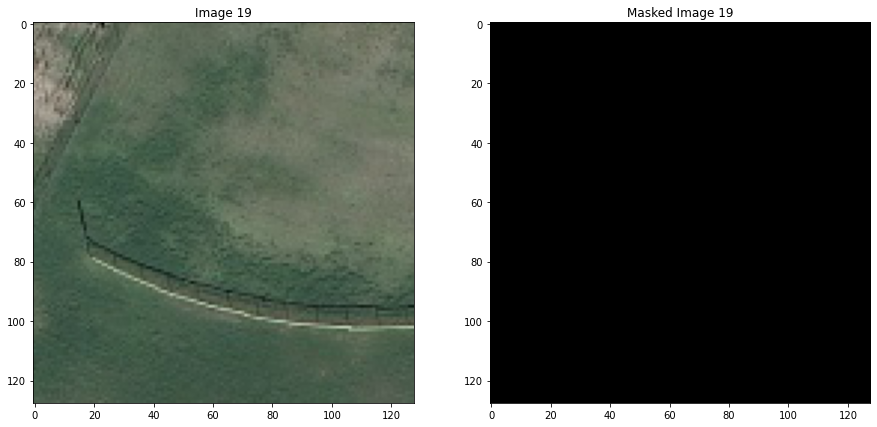

In [9]:
""" Load Train Set and view some examples """

imagepath = 'train_folder/'
maskpath = 'train_folder_gt/'
image_list,mask_list = load_data(imagepath,maskpath)
# View an example of image and corresponding mask 
show_images = 20
for i in range(show_images):
    
    img_view  = imageio.imread(image_list[i])
    mask_view = imageio.imread(mask_list[i])
    #print(img_view.shape)
    print(mask_view.shape)
    print(np.unique(mask_view))
    #print(mask_view)
    fig, arr = plt.subplots(1, 2, figsize=(15, 15))
    arr[0].imshow(img_view)
    arr[0].set_title('Image '+ str(i))
    arr[1].imshow(mask_view)
    arr[1].set_title('Masked Image '+ str(i))

In [10]:
## 
def calculate_pixel_percent(image):
    img = imageio.imread(image)
    num_dark_px    = sum(img[img >0])
    num_total_px   = img.shape[0] * img.shape[1]
    dark_area_pcnt = num_dark_px / num_total_px
    return dark_area_pcnt

In [11]:
calculate_pixel_percent(mask_list[18])

7.05047607421875

In [12]:
mask_list[18]

'train_folder_gt/austin10_0_25.png'

In [13]:
## get images with a certain pixel percentage 
def list_with_high_pixel(number):
    high_pixel_mask = []
    high_pixel_image = []
    show_images = number
    for i in range(show_images):
        pixel_pcnt = calculate_pixel_percent(mask_list[i])
        if pixel_pcnt >20:
            high_pixel_mask.append(mask_list[i])
            high_pixel_image.append(image_list[i])
    return high_pixel_image,high_pixel_mask 

In [14]:
a,high_pixel = list_with_high_pixel(100)

In [15]:
high_pixel

['train_folder_gt/austin10_0_44.png',
 'train_folder_gt/austin10_0_45.png',
 'train_folder_gt/austin10_0_51.png',
 'train_folder_gt/austin10_0_52.png',
 'train_folder_gt/austin10_0_53.png',
 'train_folder_gt/austin10_0_55.png']

In [16]:
def PreprocessData(image_list, mask_list, target_shape_img, target_shape_mask):
    """
    Processes the images and mask present in the shared list and path
    Returns a NumPy dataset with images as 3-D arrays of desired size
    Please note the masks in this dataset have only one channel
    """
    # Pull the relevant dimensions for image and mask
    m = len(image_list)                     # number of images
    i_h,i_w,i_c = target_shape_img   # pull height, width, and channels of image
    m_h,m_w,m_c = target_shape_mask  # pull height, width, and channels of mask
    
    # Define X and Y as number of images along with shape of one image
    X = np.zeros((m,i_h,i_w,i_c), dtype=np.float32)
    y = np.zeros((m,m_h,m_w,m_c), dtype=np.int32)
    
    # Resize images and masks
    for index,file in enumerate(image_list):
        # convert image into an array of desired shape (3 channels)
        path = file
        single_img = Image.open(path).convert('RGB')
        single_img = single_img.resize((i_h,i_w))
        single_img = np.reshape(single_img,(i_h,i_w,i_c)) 
        single_img = single_img/255.
        X[index] = single_img
        
    for index,file in enumerate(mask_list):
        # convert mask into an array of desired shape (1 channel)
        
        path = file
        single_mask = Image.open(path).convert("L")
        single_mask = single_mask.resize((m_h, m_w))
        single_mask = np.reshape(single_mask,(m_h,m_w,m_c)) 
        single_mask =single_mask.copy()
        single_mask[single_mask<255] = 0

# Set all values at indices where the array equals 255 to 1.
        single_mask[single_mask==255] = 1
        #single_mask =  ((single_mask - single_mask.min()) * (1/(single_mask.max() - single_mask.min()) * 2))
        single_mask = single_mask  # to ensure classes #s start from 0
        y[index] = single_mask
    return X, y

In [17]:
use_image_list,use_mask_list = list_with_high_pixel(100)

(128, 128, 3)
[  0 255]
(128, 128, 3)
[  0 255]
(128, 128, 3)
[  0 255]
(128, 128, 3)
[  0 255]
(128, 128, 3)
[  0 255]
(128, 128, 3)
[  0 255]


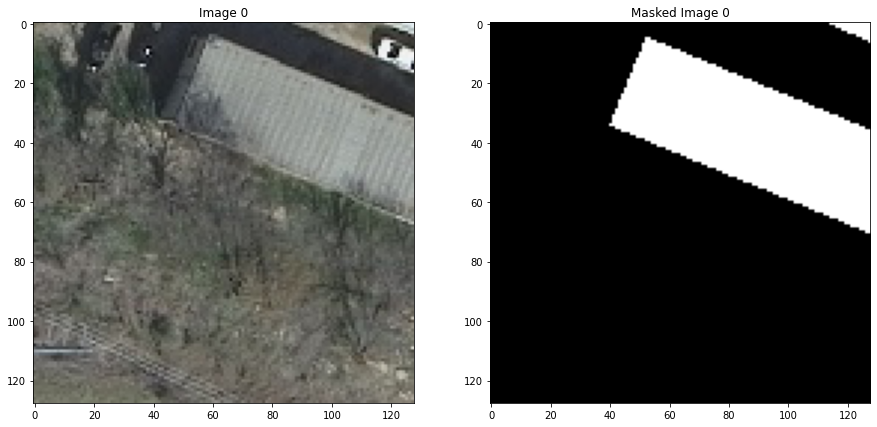

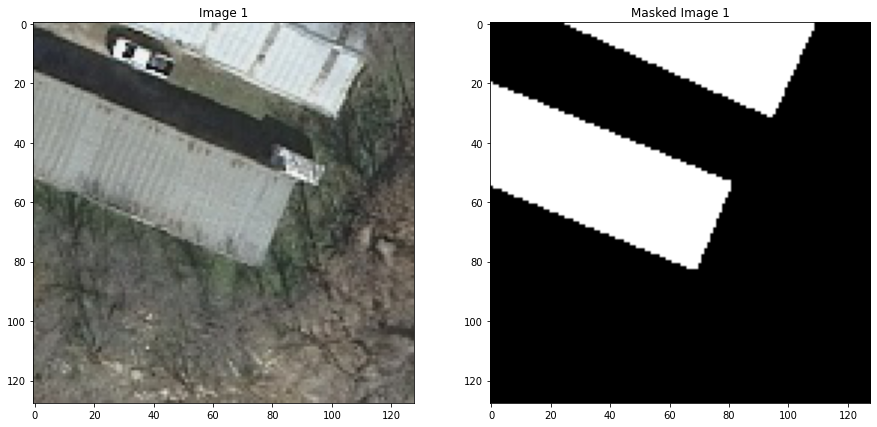

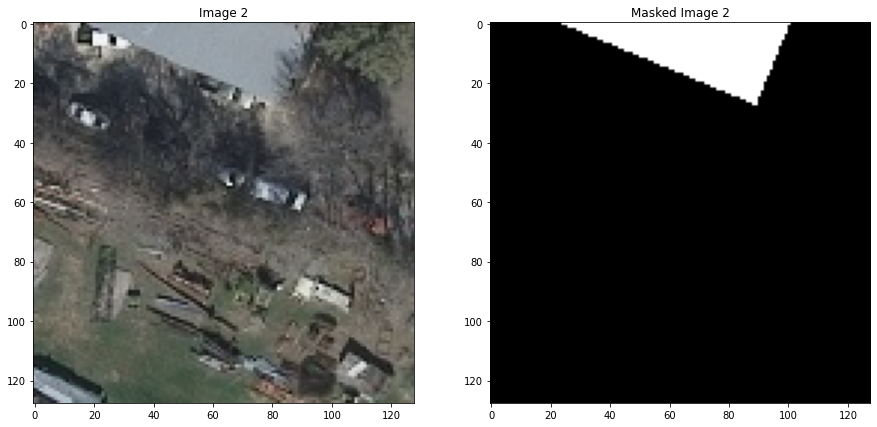

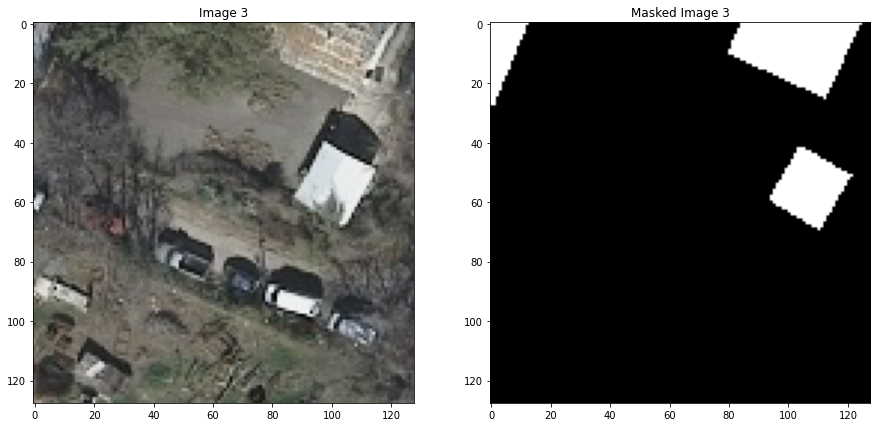

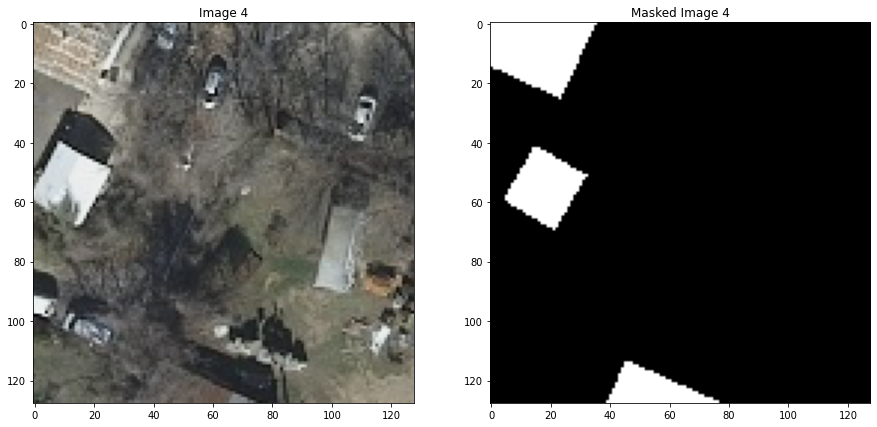

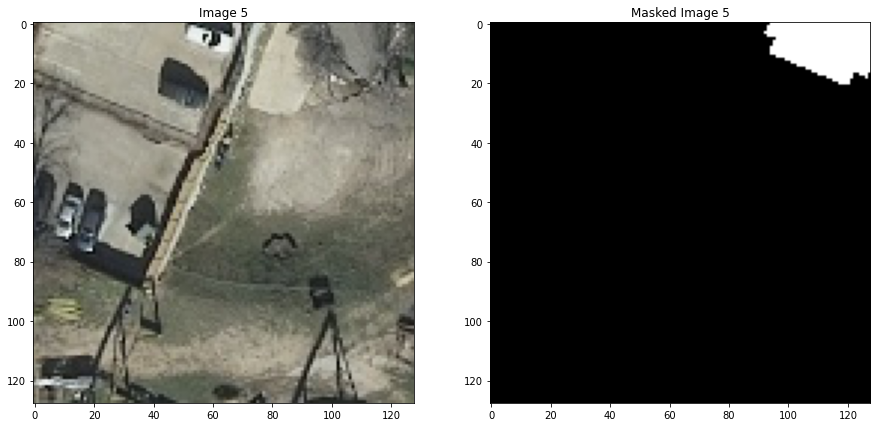

In [18]:
show_images = 6
for i in range(show_images):
    
    img_view  = imageio.imread(use_image_list[i])
    mask_view = imageio.imread(use_mask_list[i])
    #print(img_view.shape)
    print(mask_view.shape)
    print(np.unique(mask_view))
    #print(mask_view)
    fig, arr = plt.subplots(1, 2, figsize=(15, 15))
    arr[0].imshow(img_view)
    arr[0].set_title('Image '+ str(i))
    arr[1].imshow(mask_view)
    arr[1].set_title('Masked Image '+ str(i))

In [19]:
use_image_list,use_mask_list = list_with_high_pixel(5000)

In [20]:
len(use_image_list)

2434

X Shape: (1000, 128, 128, 3)
Y shape: (1000, 128, 128, 1)
[0 1]


Text(0.5, 1.0, 'Processed Masked Image ')

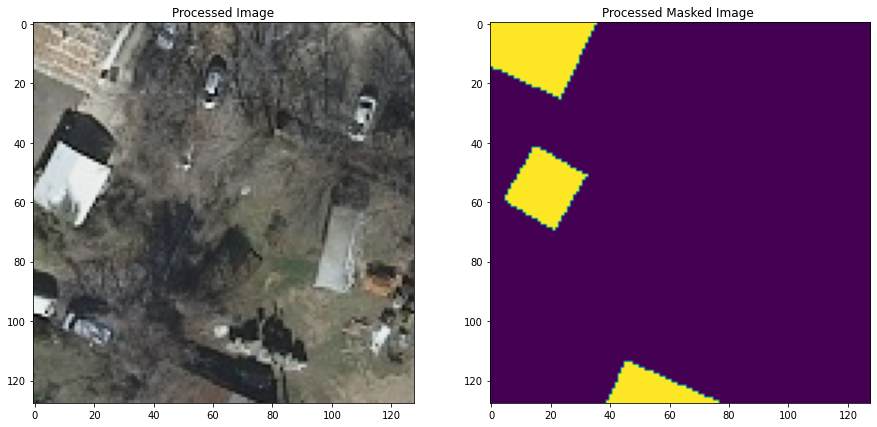

In [22]:
## print preprocessed images
#Define the desired shape
target_shape_img = [128, 128, 3]
target_shape_mask = [128, 128, 1]

# Process data using apt helper function
imagelist =use_image_list[:1000]
masklist = use_mask_list[:1000]
X1, y1 = PreprocessData(imagelist, masklist, target_shape_img, target_shape_mask)

# QC the shape of output and classes in output dataset 
print("X Shape:", X1.shape)
print("Y shape:", y1.shape)
# There are 3 classes : background, pet, outline
print(np.unique(y1))

# Visualize the output
image_index = 4
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X1[image_index])
arr[0].set_title('Processed Image')
arr[1].imshow(y1[image_index,:,:,0])
arr[1].set_title('Processed Masked Image ')

X Shape: (2000, 128, 128, 3)
Y shape: (2000, 128, 128, 1)
[0 1]


Text(0.5, 1.0, 'Processed Masked Image ')

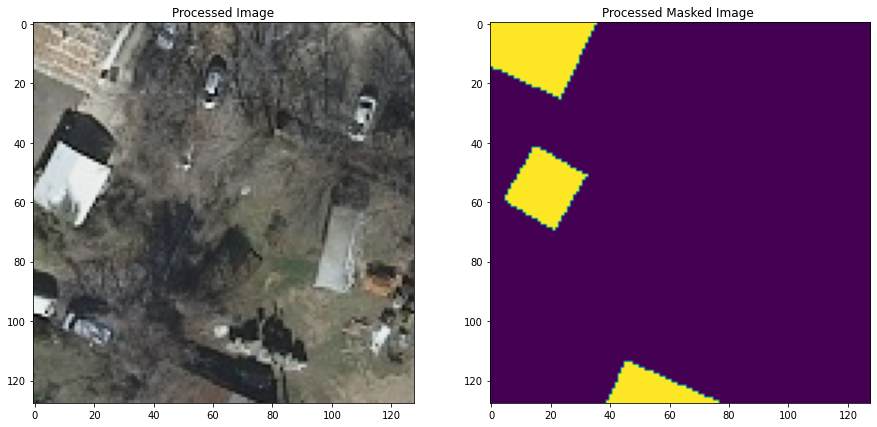

In [23]:
## print preprocessed images
#Define the desired shape
target_shape_img = [128, 128, 3]
target_shape_mask = [128, 128, 1]

# Process data using apt helper function
imagelist =use_image_list[:2000]
masklist = use_mask_list[:2000]
X, y = PreprocessData(imagelist, masklist, target_shape_img, target_shape_mask)

# QC the shape of output and classes in output dataset 
print("X Shape:", X.shape)
print("Y shape:", y.shape)
# There are 3 classes : background, pet, outline
print(np.unique(y))

# Visualize the output
image_index = 4
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')
arr[1].imshow(y[image_index,:,:,0])
arr[1].set_title('Processed Masked Image ')

In [24]:
# for bulding and running deep learning model
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications.vgg16 import *

In [26]:
# Use scikit-learn's function to split the dataset
# Here, I have used 20% data as test/valid set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X1, y1, test_size=0.2, random_state=123)

In [41]:
def fcn(image_size, ch_in=3, ch_out=1):
    
    inputs = Input(shape=(*image_size, ch_in), name='input')

    # Building a pre-trained VGG-16 feature extractor 
    vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=inputs)
    # get feature maps of the last three layers
    f3 = vgg16.get_layer('block3_pool').output  
    f4 = vgg16.get_layer('block4_pool').output  
    f5 = vgg16.get_layer('block5_pool').output  

    # Replace VGG dense layers by convolutions:
    f5_conv1 = Conv2D(filters=4086, kernel_size=7, padding='same',
                      activation='relu')(f5)
    f5_drop1 = Dropout(0.5)(f5_conv1)
    f5_conv2 = Conv2D(filters=4086, kernel_size=1, padding='same',
                      activation='relu')(f5_drop1)
    f5_drop2 = Dropout(0.5)(f5_conv2)
    f5_conv3 = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f5_drop2)


    # Using a transposed conv (w/ s=2) to upscale `f5` 
    # so it can be merged with features from `f4_conv1` obtained from `f4`:
    f5_conv3_x2 = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2,
                                use_bias=False, padding='same', activation='relu')(f5)
    f4_conv1 = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f4)

    # Merging the 2 feature maps (addition):
    merge1 = add([f4_conv1, f5_conv3_x2])

    # We repeat the operation to merge `merge1` and `f3` into a 28 x 28 map:
    merge1_x2 = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2,
                                use_bias=False, padding='same', activation='relu')(merge1)
    f3_conv1 = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f3)
    merge2 = add([f3_conv1, merge1_x2])

    # Finally, we use another transposed conv to decode and up-scale the feature map
    # to the original shape, i.e., using a stride 8 to go from 28 x 28 to 224 x 224 here:
    outputs = Conv2DTranspose(filters=ch_out, kernel_size=16, strides=8,
                              padding='same', activation='sigmoid')(merge2)
    
    fcn_model = Model(inputs, outputs)
    return fcn_model

In [42]:
# defining the tensorflow distribute strategy
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [43]:
# calling the model inside the scope
with strategy.scope():
    
    
    model = fcn(image_size=(128, 128))
  # compiling the model with the optimizer, loss function and acc metrics
    model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 1792        input[0][0]                      
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 64, 64)   0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [45]:
"""model = fcn(image_size=(128, 128))
# compiling the model with the optimizer, loss function and acc metrics
model.compile(optimizer='adam',
          loss=tf.keras.losses.BinaryCrossentropy(),
          metrics=['accuracy'])
          """ 

"model = fcn(image_size=(128, 128))\n# compiling the model with the optimizer, loss function and acc metrics\nmodel.compile(optimizer='adam',\n          loss=tf.keras.losses.BinaryCrossentropy(),\n          metrics=['accuracy'])\n          "

In [28]:
# function for showing sample images and its mask from the dataset
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [29]:
# function to create the mask
def create_mask(pred_mask):
    
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [30]:
# function to show the prediction
def show_predictions(images=None,masks =None, num=0):
    
    prediction = (model.predict(sample_image[tf.newaxis, ...])[0,:,:,0]>0.5).astype(np.uint8)
    prediction = np.expand_dims(prediction, axis=-1)

    display([sample_image, sample_mask,
             #create_mask(model.predict(sample_image[tf.newaxis, ...]))
             prediction
             ])

In [31]:
y_train[1].shape

(128, 128, 1)

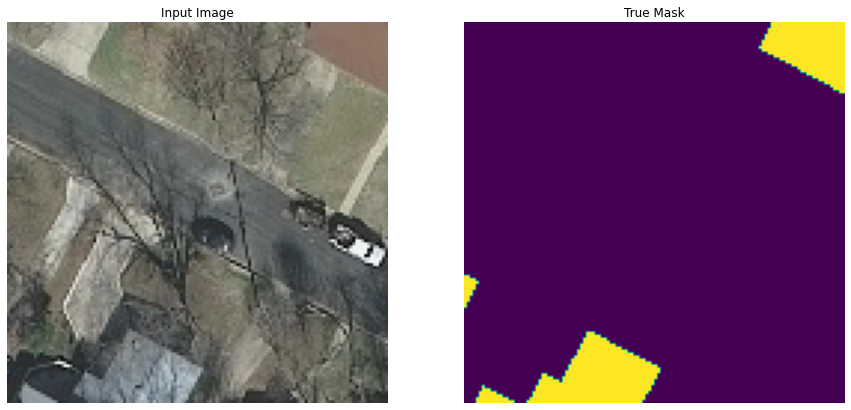

In [30]:
# train.take(1) method takes the first element f

sample_image= X_train1[2]
    
sample_mask = y_train1[2]
display([sample_image, sample_mask])



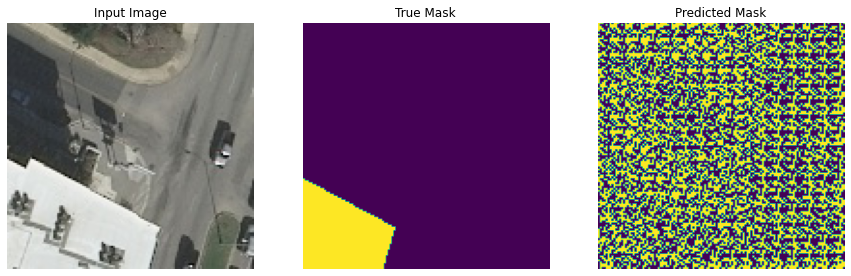

In [51]:
# Let's see a sample of input image it's true mask and what our model is predicted given the input image
show_predictions(X_train,y_train,num =2)

In [52]:
# calllback to displaying the predictions of our model while training
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))
   
 # ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
# EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)

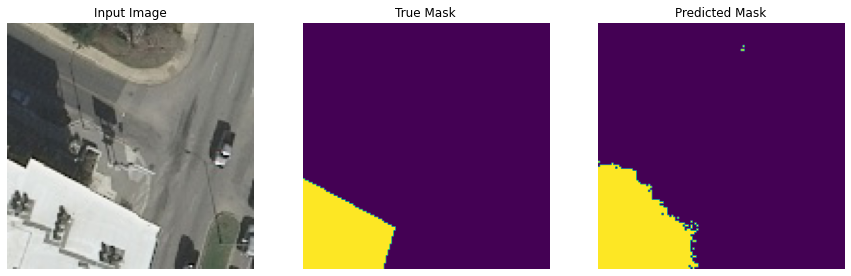


Sample Prediction after epoch 100



In [53]:



model_history = model.fit(X_train, y_train, batch_size=200, epochs=100, validation_data=(X_valid, y_valid),
                          callbacks=[DisplayCallback(), reduce_lr, early_stopping])

In [54]:
model.save("sigmoidmodel100_2000.h5")

In [55]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(model_history.history[metric_name],color='blue',label=metric_name)
    plt.plot(model_history.history['val_' + metric_name],color='green',label='val_' + metric_name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

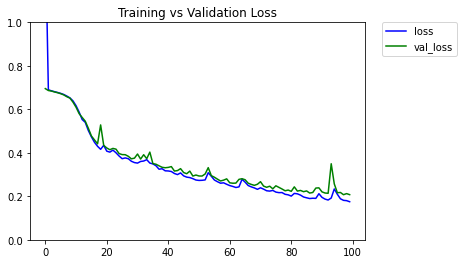

In [56]:
plot_metrics("loss", title="Training vs Validation Loss", ylim=1)

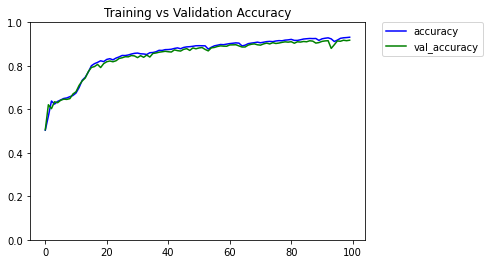

In [57]:
plot_metrics("accuracy", title="Training vs Validation Accuracy", ylim=1)

In [32]:
sample_image_one = X_train1[20]
sample_mask_one =y_train1[20]

In [45]:
# function to show the prediction
def show_predictions_one(images=None,masks =None, num=0):
    
    prediction = (model.predict(sample_image_one[tf.newaxis, ...])[0,:,:,0]>0.5).astype(np.uint8)
    prediction = np.expand_dims(prediction, axis=-1)

    display([sample_image_one, sample_mask_one,
             #create_mask(model.predict(sample_image[tf.newaxis, ...]))
             prediction
             ])

In [46]:
show_predictions_one()

NameError: name 'model' is not defined

In [33]:
sample_image_one = X_train1[20]
sample_mask_one =y_train1[20]

In [34]:
# It can be used to reconstruct the model identically.
reconstructed_model = tf.keras.models.load_model("sigmoidmodel100_2000.h5")

In [35]:
def show_predictions_one(images=None,masks =None, num=0):
    
    prediction = (reconstructed_model.predict(sample_image_one[tf.newaxis, ...])[0,:,:,0]>0.5).astype(np.uint8)
    prediction = np.expand_dims(prediction, axis=-1)

    display([sample_image_one, sample_mask_one,
             #create_mask(model.predict(sample_image[tf.newaxis, ...]))
             prediction
             ])

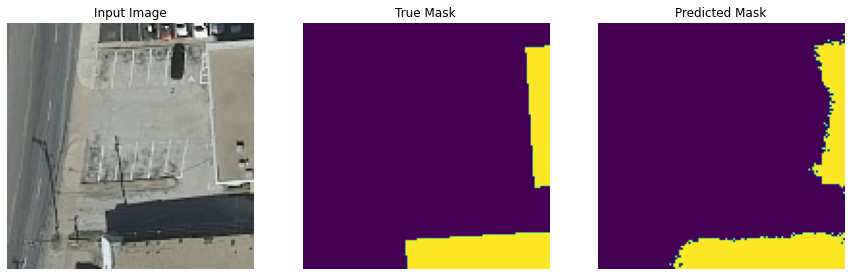

In [36]:
show_predictions_one()

In [40]:
import time 
t = time.time()    
prediction = (reconstructed_model.predict(sample_image_one[tf.newaxis, ...])[0,:,:,0]>0.5).astype(np.uint8)
elapsed_time =(time.time())- t
print("prediction completed in  - {} seconds".format(elapsed_time))

prediction completed in  - 0.5279250144958496 seconds


In [41]:
#time wrapper function 
def get_time(func):
    def func_wrapper(*args,**kwargs):
        start_time =time.time()
        func(*args,**kwargs)
        print("function {} prediction completed in -{} seconds".format(func.__name__,time.time()-start_time))
    return function_wrapper

In [63]:
#flops for the whole model 
def get_flops(modelpath):
    session = tf.compat.v1.Session()
    graph = tf.compat.v1.get_default_graph()
    
    with graph.as_default():
        with session.as_default():
            model = tf.keras.models.load_model(modelpath)
            run_meta = tf.compat.v1.RunMetadata()
            opts =tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
            
            flops = tf.compat.v1.profiler.profile(graph=graph,run_meta =run_meta, cmd = 'op',options = opts)
            
            opts = tf.compat.v1.profiler.ProfileOptionBuilder.trainable_variables_parameter()
            params = tf.compat.v1.profiler.profile(graph=graph,run_meta= run_meta,cmd ='op',options =opts)
            return flops.total_float_ops,params.total_parameters
        

In [73]:
tf.compat.v1.reset_default_graph()
total_flops,total_param = get_flops("sigmoidmodel100_2000.h5")
print("model has {} flops and {} parameters".format(total_flops,total_param))

model has 29439411 flops and 14723923 parameters


In [74]:
new_model = tf.keras.models.load_model("sigmoidmodel100_2000.h5")
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 1792        input[0][0]                      
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 64, 64)   0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [75]:
loss,acc = new_model.evaluate(X_train,y_train,verbose =2)



50/50 - 419s - loss: 0.1704 - accuracy: 0.9336


In [76]:
## visualize the model 
## first value is floating point,second value is accuracy,third value is total parameters 

fcn = [29439411,93,14723923]
unet = [17272582,78,8641729]
model_list = [["fcn",29439411,93,14723923],["unet",17272582,78,8641729]]
df_model =pd.DataFrame(model_list,columns =['model','fpo','accuracy','parameters'])

In [77]:
df_model.head()

model       fpo  accuracy  parameters
0   fcn  29439411        93    14723923
1  unet  17272582        78     8641729

In [78]:
import seaborn as sns

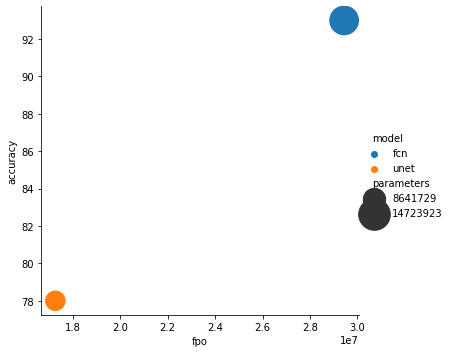

In [84]:
sns.relplot(x='fpo',y ='accuracy',size='parameters',sizes =(500,1000),hue ='model',data =df_model)